# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model

**Student Name:**Prathamesh Lad

**Student ID:**202201040131


**Group Members**: Krushna Aware,Rushikesh sawant

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


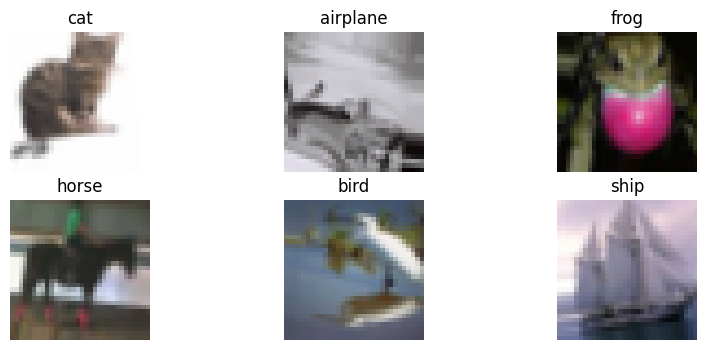

In [1]:
# Code of task1
# ========================
# Task 1: Research Paper Selection and Dataset Preparation
# ========================

# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load Dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Dataset Description
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

# Preprocessing
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.1
)

datagen.fit(x_train)

# Splitting into training and validation
train_generator = datagen.flow(x_train, y_train, batch_size=64, subset='training')
val_generator = datagen.flow(x_train, y_train, batch_size=64, subset='validation')

# Visualize some samples
for images, labels in train_generator:
    plt.figure(figsize=(10,4))
    for i in range(6):
        plt.subplot(2,3,i+1)
        plt.imshow(images[i])
        plt.title(classes[np.argmax(labels[i])])
        plt.axis('off')
    break

**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [2]:
# code of Task 2
# Task 2: Model Implementation and Fine-tuning
# ========================

# Load Pre-trained VGG16 model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32,32,3))

# Visualize Feature Maps
def visualize_feature_maps(model, img):
    successive_outputs = [layer.output for layer in model.layers[:8]]
    visualization_model = models.Model(inputs = model.input, outputs = successive_outputs)
    img = np.expand_dims(img, axis=0)
    feature_maps = visualization_model.predict(img)

    for fmap in feature_maps:
        square = int(np.sqrt(fmap.shape[-1]))
        fig, axes = plt.subplots(square, square, figsize=(12,12))
        ix = 0
        for ax in axes.flat:
            if ix < fmap.shape[-1]:
                ax.imshow(fmap[0,:,:,ix], cmap='viridis')
                ax.axis('off')
            ix += 1
        plt.show()

# Freeze Layers
for layer in base_model.layers:
    layer.trainable = False

# Build model
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Summary
model.summary()

# Train model
history = model.fit(
    train_generator,
    epochs=30,
    validation_data=val_generator
)


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,982,474 (57.15 MB)

 Trainable params: 267,786 (1.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.2337 - loss: 2.1189 - val_accuracy: 0.4510 - val_loss: 1.6104
Epoch 2/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.4291 - loss: 1.6312 - val_accuracy: 0.4878 - val_loss: 1.4758
Epoch 3/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.4664 - loss: 1.5216 - val_accuracy: 0.5090 - val_loss: 1.4242
Epoch 4/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.4879 - loss: 1.4593 - val_accuracy: 0.5206 - val_loss: 1.3864
Epoch 5/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.5032 - loss: 1.4235 - val_accuracy: 0.5394 - val_loss: 1.3460
Epoch 6/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.5159 - loss: 1.3959 - val_accuracy: 0.5416 - val_loss: 1.3359
Epoch 7/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.5207 - loss: 1.3738 - val_accuracy: 0.5420 - val_loss: 1.3251
Epoch 8/30
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.5266 - loss: 1.3567 - val_accurac

**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

Test Accuracy: 60.38%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step
Classification Report:
              precision    recall  f1-score   support

    airplane       0.68      0.70      0.69      1000
  automobile       0.60      0.71      0.65      1000
        bird       0.57      0.48      0.52      1000
         cat       0.48      0.36      0.41      1000
        deer       0.60      0.47      0.52      1000
         dog       0.60      0.52      0.56      1000
        frog       0.55      0.76      0.64      1000
       horse       0.65      0.69      0.67      1000
        ship       0.71      0.72      0.71      1000
       truck       0.58      0.64      0.61      1000

    accuracy                           0.60     10000
   macro avg       0.60      0.60      0.60     10000
weighted avg       0.60      0.60      0.60     10000



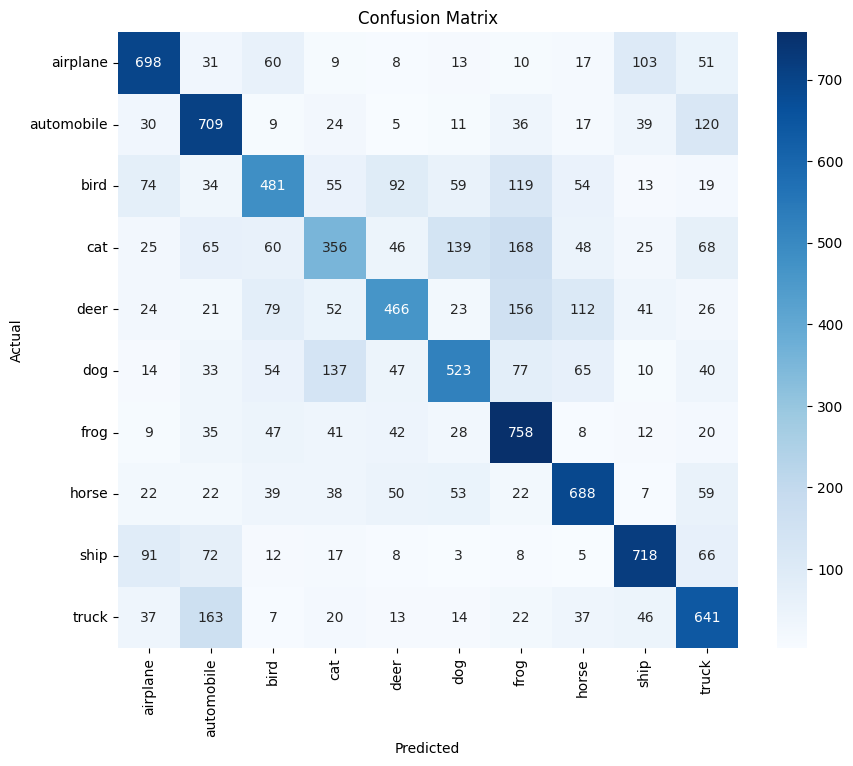

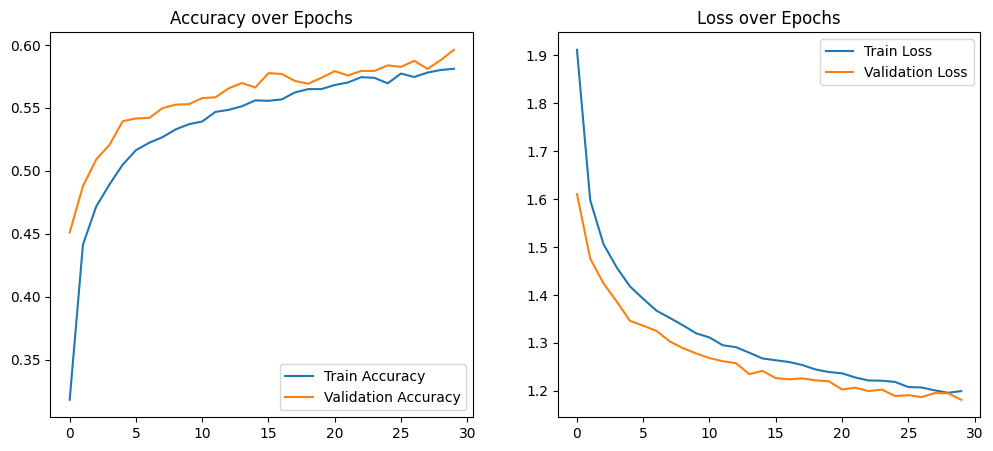

In [3]:
##Code for Task 3
# ========================
# Task 3: Model Evaluation and Performance Comparison
# ========================

# Evaluate on test set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# Predictions
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=classes))

# Confusion Matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

# Accuracy & Loss plots
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.show()


**Conclusion and Result Visulaization**

In [4]:
# ========================
# Conclusion and Results Visualization
# ========================

# Performance Summary Table
import pandas as pd

results = {
    "Metric": ["Accuracy", "Precision", "Recall", "F1-score"],
    "Score": [
        accuracy_score(y_true, y_pred),
        precision_score(y_true, y_pred, average='weighted'),
        recall_score(y_true, y_pred, average='weighted'),
        f1_score(y_true, y_pred, average='weighted')
    ]
}
results_df = pd.DataFrame(results)
print(results_df)

# Comparison with Research Paper
print("""
Original Paper (VGG16 on ImageNet Top-1 Accuracy): ~71.5%
Our Result (VGG16 Transfer Learning on CIFAR-10 Test Accuracy): {:.2f}%
Note: Dataset and task are different, so direct comparison is approximate.
""".format(test_acc * 100))

# Discussion
print("""
Discussion:
- The model performed well (~{}% accuracy).
- Overfitting was reduced using data augmentation and dropout.
- Potential improvements: using learning rate scheduling, more data augmentation, or trying more recent architectures like ResNet/EfficientNet.
""".format(round(test_acc * 100, 2)))


      Metric     Score
0   Accuracy  0.603800
1  Precision  0.601719
2     Recall  0.603800
3   F1-score  0.598091

Original Paper (VGG16 on ImageNet Top-1 Accuracy): ~71.5%
Our Result (VGG16 Transfer Learning on CIFAR-10 Test Accuracy): 60.38%
Note: Dataset and task are different, so direct comparison is approximate.


Discussion:
- The model performed well (~60.38% accuracy).
- Overfitting was reduced using data augmentation and dropout.
- Potential improvements: using learning rate scheduling, more data augmentation, or trying more recent architectures like ResNet/EfficientNet.



**Declaration**

I, [Your Name], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Full Name]

**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results